# Technique Assignment 3: Linear regression
## Cogs 109 Spring 2020
### Student Name

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## 1. (15 points) Datasets and variables

Find a dataset from the [UCI machine learning repository](http://archive.ics.uci.edu/ml/index.php) that is suitable for linear regression. Provide a link to your chosen dataset and briefly describe its content.

**(9)** List the following:
* number of variables
* number of samples
* labels (what is the label?)

**(6)** Create and report a research question that you could answer using this dataset and some or all of the variables.

Link: http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime <br>
This data set contains information about different communities across America. The information for each community is in some way connected to crime. The communities that were not found in census and crime datasets were omitted from the dataset. <br>
- It is a dataset of 1994 samples (communities) 
- with 128 variables each (attributes of each community).<br>
- The label is each community. <br>


I think this dataset is can have a lot of different research questions. <br>
First, we can see how each different attribute of the community affects the number of Violent Crimes per Capita. 
- ie. How the percentage of unemployed people affects crime
- or how the police budget per capita affects crime

We can also do multivariate regression on this dataset, where we can take two variables that may have dependency on each other like 'Police Budget per Capita' and number of 'Police Cars' and see how these can affect the 'Violent Crimes per Capita'.

## 2. (20) Arrays and numpy
This tutorial should be very helpful:
https://www.numpy.org/devdocs/user/quickstart.html
### a. **(10)**
Use arange() and reshape() from numpy to create a 4x5 array containing the integers 1 through 20.
Append a column of ones to the left of your array to create a 4x6 array.
Multiply every element of the array by 2.
Print **only** the resulting array.

In [2]:
x = np.arange(1, 21).reshape(4, 5)
ones = np.ones(4, dtype=int)

In [3]:
combined = np.vstack([ones, x.T]).T
combined * 2

array([[ 2,  2,  4,  6,  8, 10],
       [ 2, 12, 14, 16, 18, 20],
       [ 2, 22, 24, 26, 28, 30],
       [ 2, 32, 34, 36, 38, 40]])

### b. (10)
Use linspace() and reshape() to create a 20 x 20 array that contains a smooth range of values between 0 and 1, inclusive.

Create a scatter plot using the first (leftmost) column of your array as the x values and the last (rightmost) column of your array as the y values. Use x limits 0 and 1 and y limits 0 and 1 for your plot.

In [4]:
data = np.linspace(0, 1, 20*20).reshape(20,20)

In [5]:
x = data.T[0]
y = data.T[19]

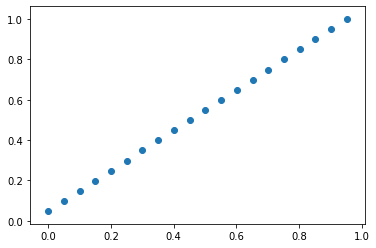

In [6]:
plt.scatter(x, y)

## 3. (40 points) Univariate linear regression

*Note: Solutions to this problem must follow the method described in class and the linear regression handout. There is some flexibility in how your solution is coded, but you may not use special functions that automatically perform linear regression for you.*

Load in the BodyBrainWeight.csv dataset. Perform linear regression using two different models:

M1: brain_weight = w0 + w1 x body_weight

M2: brain_weight = w0 + w1 x body_weight + w2 x body_weight^2

### a. **(15)**
For each model, follow the steps shown in class to solve for w. Report the model, including w values and variable names for both models.


### b. **(10)**
Use subplots to display two graphs, one for each model. In each graph, include:
* Labeled x and y axes
* Title
* Scatterplot of the dataset
* A smooth line representing the model

### c. **(10)**
For each model, calculate the sum squared error (SSE). Show your 2 SSE values together in a bar plot.

### d. **(5)**
Which model do you think is better? Why? Is there a different model that you think would better represent the data?

### Part a: Models

In [7]:
## Load the dataset and extract Body weight as X and Brain weight as Y
bbdata = pd.read_csv("BodyBrainWeight.csv").values

In [8]:
X = bbdata[:,0] # body weight
Y = bbdata[:,1] # brain weight

In [9]:
## Create A, the augmented data array
ones = np.ones(X.size)

A1 = np.vstack([ones, X]).T

## Solve for w, the weight vector
w1 = np.linalg.lstsq(A1, Y, rcond = None)[0]

print("Model M1:")
print("Brain weight = %f + %f x Body_Weight" % tuple(w1))

Model M1:
Brain weight = 124.928105 + 0.937039 x Body_Weight


In [10]:
## Create A, the augmented data array

ones = np.ones(X.size)
squares = np.square(X)

A2 = np.vstack([ones, X, squares]).T

## Solve for w, the weight vector
w2 = np.linalg.lstsq(A2, Y, rcond = None)[0]

print("Model M2:")
print("Brain weight = %f + %f x Body_Weight + %f x Body_Weight^2" % tuple(w2))

Model M2:
Brain weight = 49.091369 + 1.590462 x Body_Weight + -0.000109 x Body_Weight^2


### Part b: Plotting

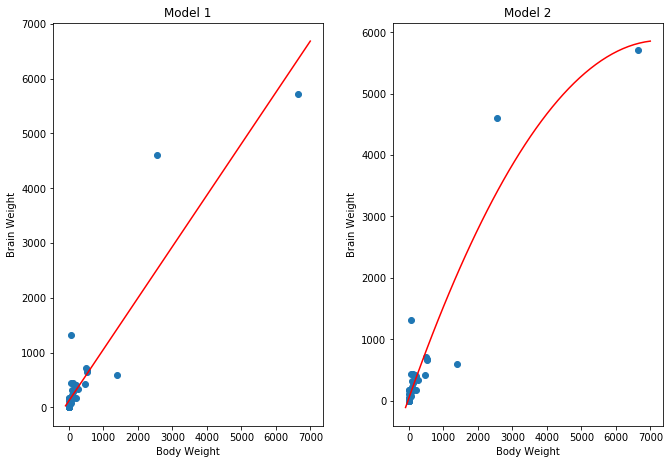

In [11]:
fig, axes = plt.subplots(1,2, figsize=(10,7))
fig.tight_layout(pad=4.0)

# set names for model 1 
axes[0].set_title('Model 1')
axes[0].set_xlabel("Body Weight")
axes[0].set_ylabel("Brain Weight")

# set names for model 2
axes[1].set_title('Model 2')
axes[1].set_xlabel("Body Weight")
axes[1].set_ylabel("Brain Weight")

# scatter plots 
axes[0].scatter(X, Y)
axes[1].scatter(X, Y)

# line for Model 1
x1 = np.linspace(-100, 7000, X.size)
A1 = np.vstack([ones, x1]).T
y1 = np.matmul(A1, w1)
axes[0].plot(x1, y1, color = 'red')

# line for Model 2
x2 = np.linspace(-100, 7000, X.size)
squares = np.square(x2)
A2 = np.vstack([ones, x2, squares]).T
y2 = np.matmul(A2, w2)
axes[1].plot(x2, y2, color = 'red')

### Part c: SSE

In [12]:
# function that calculates the SSE of the data given
def SSE(actual, predicted):
    return np.sum(np.square(predicted - actual))

In [13]:
actual = Y
ones = np.ones(X.size)
squares = np.square(X)

In [14]:
# Model 1 SSE
A = np.vstack([ones, X]).T
predicted = np.matmul(A, w1)

SSE1 = SSE(actual, predicted)

In [15]:
# Model 2 SSE
A = np.vstack([ones, X, squares]).T
predicted = np.matmul(A, w2)

SSE2 = SSE(actual, predicted)

<BarContainer object of 2 artists>

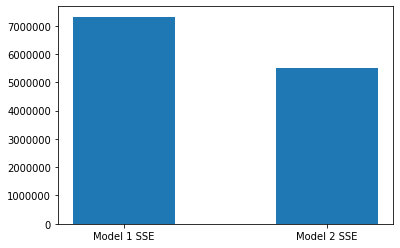

In [16]:
plt.bar(['Model 1 SSE', 'Model 2 SSE'], [SSE1, SSE2], width=0.5)

### Part d: Conclusion

- Model 2
- Because it has considerably lower SSE and it follows the pattern well without overfitting. 
- No, I think that higher order models will start overffiting the data.

## 4. (25 points) Multivariate linear regression with cross validation

Using the dataset found in Housing.csv, build a multivariate model to predict house price using lot size and the number of bedrooms as predictors.

Hint: You may use this as your model:

Price = w0 + w1 x Lot size + w2 x Bedrooms

First, split your data into a training set (80%) and a test set (20%). Then perform linear regression using the **training data** only. Report your model and show the mean squared error (MSE) for your **training** and **test** data using a bar graph.

MSE can be found by dividing SSE by the number of samples in your data.


In [17]:
## Load the housing data
df = pd.read_csv("Housing.csv")
df

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [18]:
df = df.sample(frac=1, replace=False) # shuffle the data 
df

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
436,437,132000.0,7800,3,2,2,yes,no,no,no,no,0,yes
411,412,95000.0,6500,3,2,3,yes,no,no,no,yes,0,yes
274,275,65000.0,3640,3,1,2,yes,no,no,no,yes,0,no
10,11,90000.0,7200,3,2,1,yes,no,yes,no,yes,3,no
359,360,107000.0,6600,3,1,4,yes,no,no,no,yes,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,58000.0,4320,3,1,2,yes,no,no,no,no,2,yes
446,447,114900.0,7482,3,2,3,yes,no,no,yes,no,1,yes
46,47,41000.0,3040,2,1,1,no,no,no,no,no,0,no
513,514,66000.0,5010,3,1,2,yes,no,yes,no,no,0,no


In [19]:
# Extract the variables
Y = df['price'].values
X1 = df['lotsize'].values
X2 = df['bedrooms'].values

In [20]:
# Get training data, 109 being the 20% cut 
Y_train = Y[109:]
X1_train = X1[109:]
X2_train = X2[109:]

In [21]:
# Create A, augmented array 
ones = np.ones(X1_train.size)

A_train = np.vstack([ones, X1_train, X2_train]).T

# Calculate weights
w = np.linalg.lstsq(A_train, Y_train, rcond = None)[0]

In [22]:
print("Model")
print("Price = %f + %f x Lot size + %f x Bedrooms" % tuple(w))

Model
Price = 10034.714003 + 5.723109 x Lot size + 9730.460411 x Bedrooms


In [23]:
# MSE for training data
predicted = np.matmul(A_train, w)
MSE_train = SSE(Y_train, predicted) / predicted.size
MSE_train

469465647.92941946

In [24]:
# MSE on test data 
Y_test = Y[:109]
X1_test = X1[:109]
X2_test = X2[:109]

ones = np.ones(Y_test.size)

In [25]:
A_test = np.vstack([ones, X1_test, X2_test]).T

In [26]:
predicted = np.matmul(A_test, w)
MSE_test = SSE(Y_test, predicted) / predicted.size
MSE_test

368347640.0698275

<BarContainer object of 2 artists>

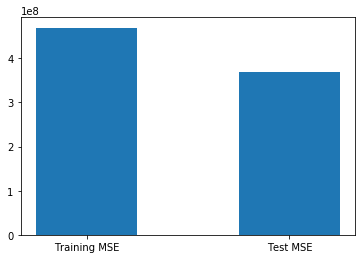

In [27]:
plt.bar(['Training MSE', 'Test MSE'], [MSE_train, MSE_test], width=0.5)

## Extra Credit

I think the following model could also be used: <br>
- Price = w0 + w1 x Lot size + w2 x Lot size x Bedrooms 

Since the Lot size and the number of Bedrooms could have some dependency on each other. <br>
Usually bigger houses should have more bedrooms. <br> 
The model above allows us to account for variable interaction between lotsize and bedroom.

In [28]:
# Create A, augmented array 
ones = np.ones(Y_train.size)
combined = X1_train * X2_train

A_train = np.vstack([ones, X1_train, combined]).T

# Calculate weights
w = np.linalg.lstsq(A_train, Y_train, rcond = None)[0]

In [29]:
print("Model")
print("Price = %f + %f x Lot size + %f x Lot size x Bedrooms " % tuple(w))

Model
Price = 39763.067035 + 0.188325 x Lot size + 1.780383 x Lot size x Bedrooms 


In [30]:
# MSE for training data
predicted = np.matmul(A_train, w)
MSE_train = SSE(Y_train, predicted) / predicted.size
MSE_train

466848422.7026237

In [31]:
# MSE on test data 
ones = np.ones(Y_test.size)
combined = X1_test * X2_test

A_test = np.vstack([ones, X1_test, combined]).T

In [32]:
predicted = np.matmul(A_test, w)
MSE_test = SSE(Y_test, predicted) / predicted.size
MSE_test

369455686.56682545

<BarContainer object of 2 artists>

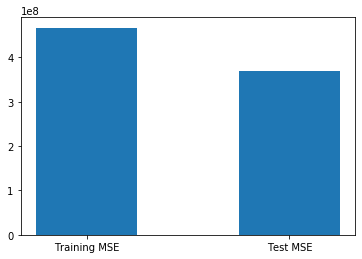

In [33]:
plt.bar(['Training MSE', 'Test MSE'], [MSE_train, MSE_test], width=0.5)

The difference in the MSEs is increased using the second model (Test SSE decreased). <br>
But the difference is not very significant (differnce only by 1%).
